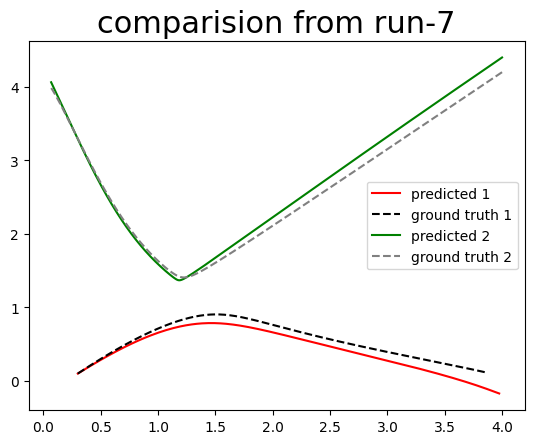

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sys
sys.path.append('../src')
from config.test0422 import TestSettings


func_name = 'toggle'
cfg = TestSettings[func_name]

x_num = cfg['common']['x_num']
y_num = cfg['common'].get('y_num', 1)
x_range = cfg['common']['x_range']

class ODE:
    def __init__(self, x_range, params, dt) -> None:
        self.x_range = np.asarray(x_range, dtype = np.float32)
        self.params = params
        self.x_len = len(x_range)
        self.dt = dt
    
    def _equation(self, x, t) -> np.ndarray:
        '''
        ODE Equations. you should make sure that the parameters
        have ``x`` and ``t``.
        '''
        raise NotImplementedError
    
    def solve(self, t_f, x_ini):
        '''
        solve the ODE equations using ``odeint``.
        '''
        tspan = np.linspace(0, t_f, int(t_f / self.dt))
        x = odeint(self._equation, x_ini, tspan)
        return x

class Toggle(ODE):
    '''
    Paper: https://www.nature.com/articles/35002131#Sec7
    Parameter: https://2013.igem.org/Team:Duke/Modeling/Kinetic_Model
    '''
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
    def _equation(self, x, t) -> np.ndarray:
        alpha_1, alpha_2, beta, gamma = self.params
        dx = np.zeros_like(x)
        dx[0] = alpha_1 / (1 + x[1] ** beta) - x[0]
        dx[1] = alpha_2 / (1 + x[0] ** gamma) - x[1]
        return dx

class MyToggle(ODE):
    '''
    Paper: https://www.nature.com/articles/35002131#Sec7
    Parameter: https://2013.igem.org/Team:Duke/Modeling/Kinetic_Model
    '''
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
    def _equation(self, x, t) -> np.ndarray:
        dx = np.zeros_like(x)
        # log-7
        dx[0] = (-1.0910570837*x[0]*(x[1]**3 + 1.0020121126) + 4.3751627689)/(x[1]**3 + 1.0020121126)
        dx[1] = (-0.2687188783*x[0]**3 - 0.9999988123*x[1]*(x[0]**3 + 1.0006364756) + 4.0957184602907)/(x[0]**3 + 1.0006364756)
        # log-3
        # dx[0] = (-1.0910570837*x[0]*(x[1]**3 + 1.0018642561) + 4.3743651287)/(x[1]**3 + 1.0018642561)
        # dx[1] = (-0.999992536*x[1]*(x[0]**3 + 0.9510599014) + 4.1233952239)/(x[0]**3 + 0.9510599014)
        return dx


ax = plt.axes()
ax.set_title('comparision from run-7', fontdict={'size':22})

# 0.3, 0.1
x_gt_1 = Toggle(
        x_range = list(x_range.values()),
        params = cfg['params'],
        dt = cfg['dt'],
    ).solve((cfg['traj_points'] + 2) * cfg['dt'] * 40, (0.3, 0.1))
x_my_1 = MyToggle(
        x_range = list(x_range.values()),
        params = cfg['params'],
        dt = cfg['dt'],
    ).solve((cfg['traj_points'] + 2) * cfg['dt'] * 40, (0.3, 0.1))
ax.plot(x_my_1[:, 0], x_my_1[:, 1], color='red', label='predicted 1')
ax.plot(x_gt_1[:, 0], x_gt_1[:, 1], color='black', linestyle='dashed', label='ground truth 1')

# 1.2, 2
x_gt_2 = Toggle(
        x_range = list(x_range.values()),
        params = cfg['params'],
        dt = cfg['dt'],
    ).solve((cfg['traj_points'] + 2) * cfg['dt'] * 80, (4, 4.2))
x_my_2 = MyToggle(
        x_range = list(x_range.values()),
        params = cfg['params'],
        dt = cfg['dt'],
    ).solve((cfg['traj_points'] + 2) * cfg['dt'] * 80, (4, 4.4))
ax.plot(x_my_2[:, 0], x_my_2[:, 1], color='green', label='predicted 2')
ax.plot(x_gt_2[:, 0], x_gt_2[:, 1], color='gray', linestyle='dashed', label='ground truth 2')


ax.legend()
plt.savefig('gene-run7.png', dpi=300, bbox_inches='tight')
plt.show()